In [3]:
from google.colab import files
uploaded = files.upload()

In [4]:
import pandas as pd
import io
import numpy as np

# Load uploaded dataset
spiral_data = pd.read_csv(io.StringIO(uploaded['spiral.csv'].decode('utf-8')))
spiral_data.head()

,31.95,7.95,3
0,31.15,7.30,3
1,30.45,6.65,3
2,29.70,6.00,3
3,28.90,5.55,3
4,28.05,5.00,3


Text(0.5,1,u'Spiral Dataset')

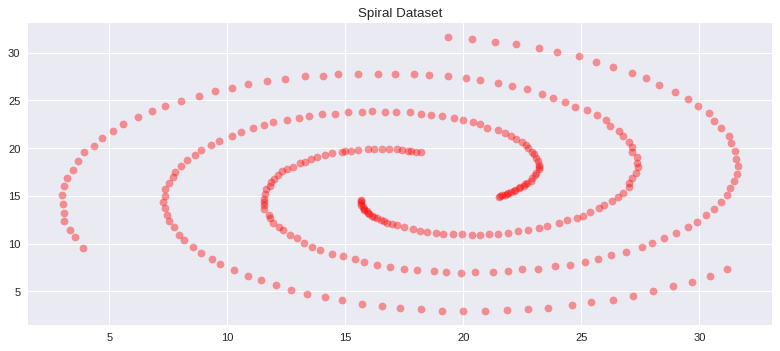

In [44]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

df1 = spiral_data.iloc[:, 0:1]
df2 = spiral_data.iloc[:, 1:2]

plt.figure(figsize=(12, 5), dpi=80)
plt.plot(df1, df2, 'o', color='red', alpha=0.4)
plt.title("Spiral Dataset")


In [23]:
from google.colab import files
uploaded2 = files.upload()

In [24]:
import pandas as pd
import io
import numpy as np

# Load uploaded dataset
compound_data = pd.read_csv(io.StringIO(uploaded2['Compound.csv'].decode('utf-8')))
compound_data.head()

,26.75,22.15,1
0,29.80,22.15,1
1,31.55,21.10,1
2,27.70,20.85,1
3,29.90,19.95,1
4,26.80,19.05,1


Text(0.5,1,u'Compound Dataset')

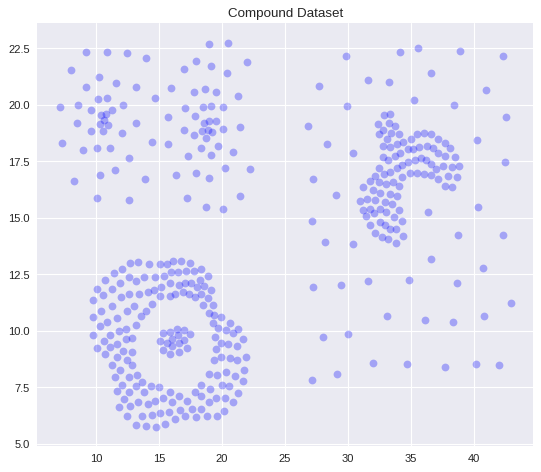

In [40]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

df1 = compound_data.iloc[:, 0:1]
df2 = compound_data.iloc[:, 1:2]

plt.figure(figsize=(8, 7), dpi=80)
plt.plot(df1, df2, 'o',color = 'blue', alpha=0.3)
plt.title("Compound Dataset")

In [29]:
from google.colab import files
uploaded3 = files.upload()

In [30]:
import pandas as pd
import io
import numpy as np

# Load uploaded dataset
unbalance_data = pd.read_csv(io.StringIO(uploaded3['unbalance.txt'].decode('utf-8')), sep=" ")
unbalance_data.head()

,151700,351102
0,155799,354358
1,142857,352716
2,152726,349144
3,151008,349692
4,145865,351895


Text(0.5,1,u'Unbalance Dataset')

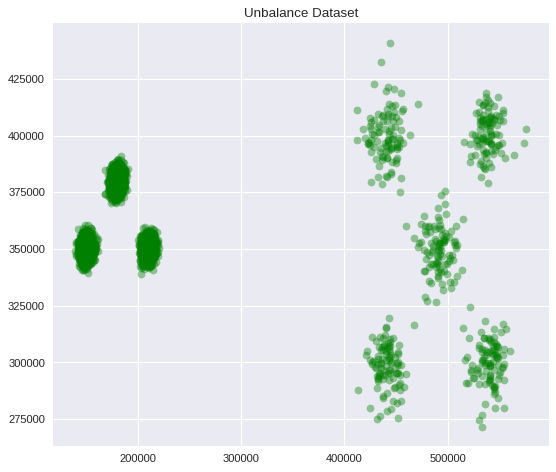

In [45]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

df1 = unbalance_data.iloc[:, 0:1]
df2 = unbalance_data.iloc[:, 1:2]

plt.figure(figsize=(8, 7), dpi=80)
plt.plot(df1, df2, 'o', color = 'green', alpha=0.4)
plt.title("Unbalance Dataset")

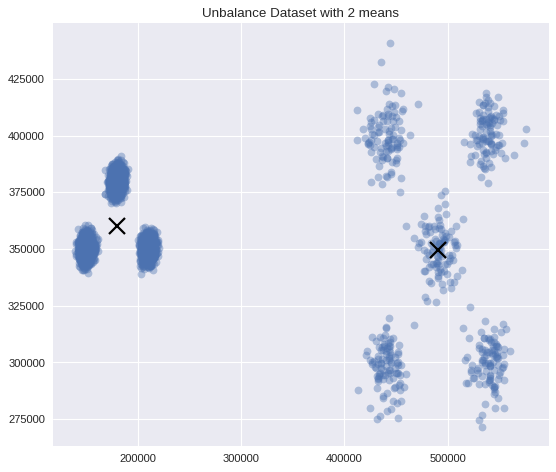

In [70]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as pyplot
import numpy

k = 2
KMeans = KMeans(n_clusters=k)  
KMeans.fit(unbalance_data) #add dataset here
centroids = KMeans.cluster_centers_
labels = KMeans.labels_

df1 = unbalance_data.iloc[:, 0:1]
df2 = unbalance_data.iloc[:, 1:2]

plt.figure(figsize=(8, 7), dpi=80)

pyplot.plot(df1,df2,'o', alpha=0.4)

for i in range(k):
    # plot the centroids
    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
    
    # make the centroid x's bigger
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
    pyplot.title('Unbalance Dataset with 2 means')

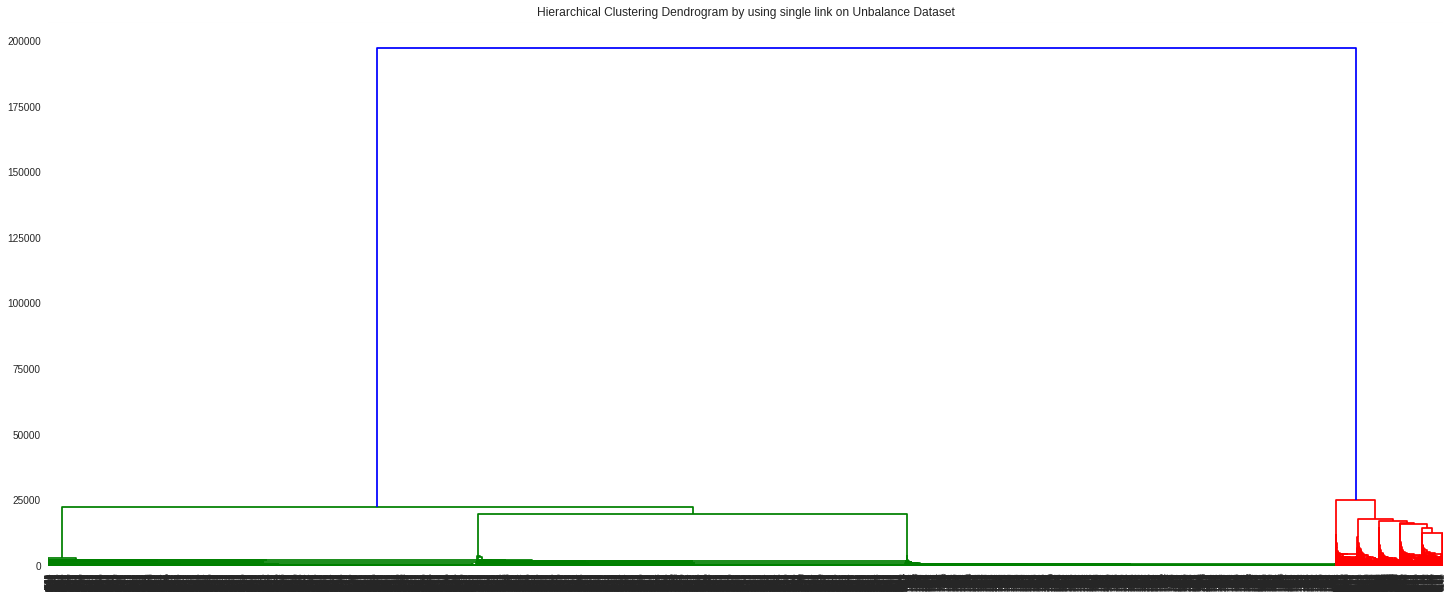

In [91]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

data = unbalance_data

z = linkage(data, 'single')
c, coph_dists = cophenet(z, pdist(data))
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram by using single link on Unbalance Dataset')
dendrogram(
    z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

Estimated number of clusters: 3
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


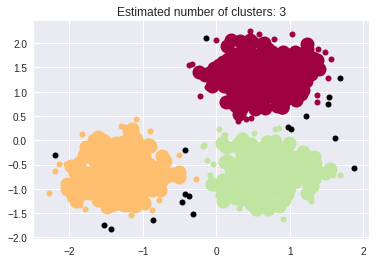

In [94]:

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

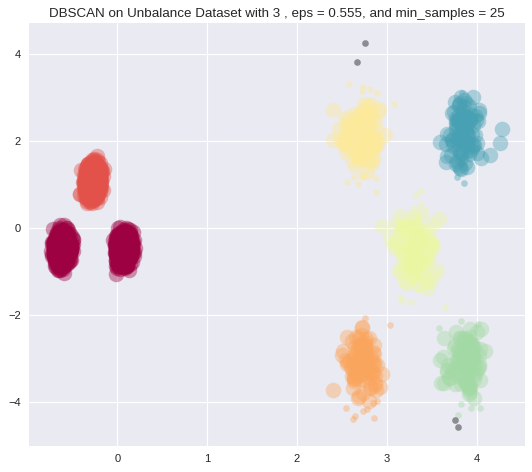

In [127]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

data = unbalance_data

X = StandardScaler().fit_transform(data)

# Compute DBSCAN
db = DBSCAN(eps=0.555, min_samples=25).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 7), dpi=80)

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', alpha = 0.4, markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', alpha = 0.4, markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('DBSCAN on Unbalance Dataset with %d , eps = 0.555, and min_samples = 25' % n_clusters_)
plt.show()
    
